<a href="https://colab.research.google.com/github/Nihelesh/Visualization-Python/blob/main/Data_in_Action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme()

In [ ]:
file_path = "/content/Sample - Superstore Sales (Excel) (2).xls"
df = pd.read_excel(file_path)

# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create new columns
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

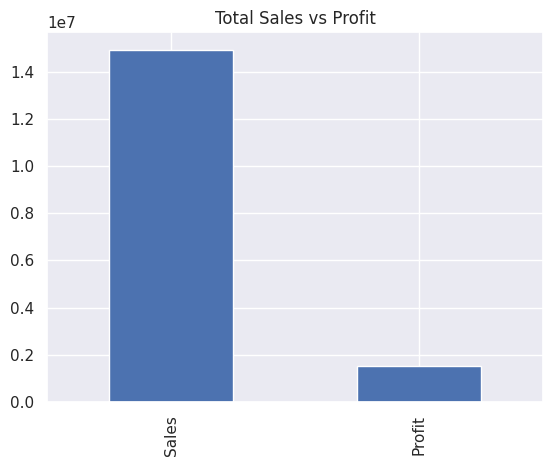

In [ ]:
df[['Sales','Profit']].sum().plot(kind='bar',title='Total Sales vs Profit')
plt.show()

In [ ]:
print(df.columns)
Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity', 'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price', 'Shipping Cost', 'Customer Name', 'Province', 'Region', 'Customer Segment', 'Product Category', 'Product Sub-Category', 'Product Name', 'Product Container', 'Product Base Margin', 'Ship Date', 'Year', 'Month', 'Month_Name', 'Delivery_Days'],  dtype='object')


Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin', 'Ship Date',
       'Year', 'Month', 'Month_Name', 'Delivery_Days'],
      dtype='object')


NameError: name 'Index' is not defined

In [ ]:
#Clean Column Names (BEST PRACTICE)
df.columns = df.columns.str.strip()


In [ ]:
print(df.columns)
Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
'Shipping Cost', 'Customer Name', 'Province', 'Region',
'Customer Segment', 'Product Category', 'Product Sub-Category',
'Product Name', 'Product Container', 'Product Base Margin', 'Ship Date',
'Year', 'Month', 'Month_Name', 'Delivery_Days'],
dtype='object')

NameError: name 'Index' is not defined

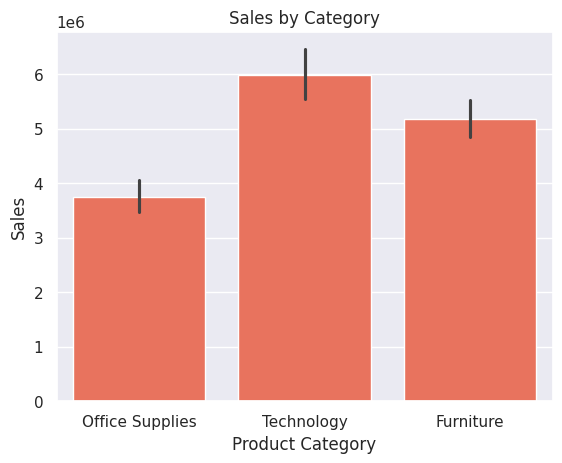

In [ ]:
sns.barplot(data=df,x='Product Category',y='Sales',estimator=sum, color='tomato')
plt.title("Sales by Category")
plt.show()

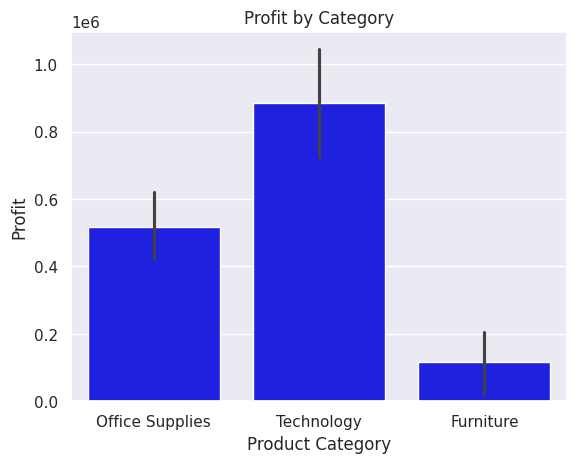

<Figure size 1800x1400 with 0 Axes>

In [ ]:
sns.barplot(data=df, x='Product Category', y='Profit', estimator=sum, color="blue")
plt.title("Profit by Category")
plt.figure(figsize=(18, 14))
plt.show()

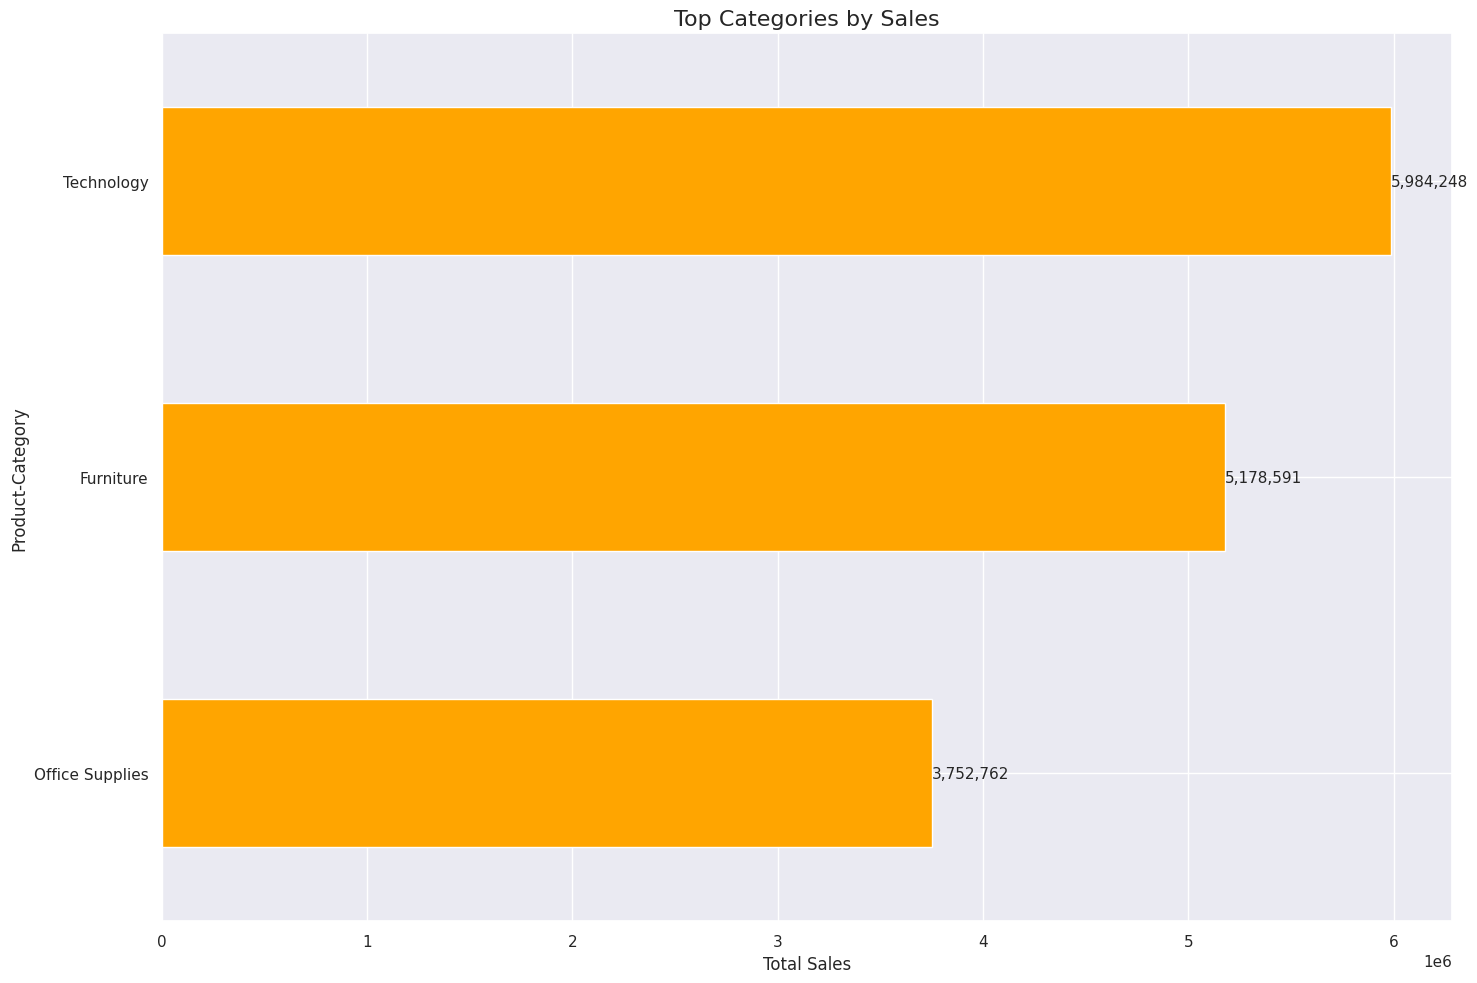

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
top_sub = (
df.groupby('Product Category')['Sales']
.sum()
.sort_values(ascending=False)
.head(10)
)
ax = top_sub.plot(kind='barh',color="orange")
# Add numbers on bars
for i, value in enumerate(top_sub.values):
  ax.text( value, i, f'{value:,.0f}', va='center',ha='left',fontsize=11)
ax.invert_yaxis()
plt.title("Top Categories by Sales", fontsize=16)
plt.xlabel("Total Sales")
plt.ylabel("Product-Category")
plt.tight_layout()
plt.show()

NameError: name 'add_line_labels' is not defined

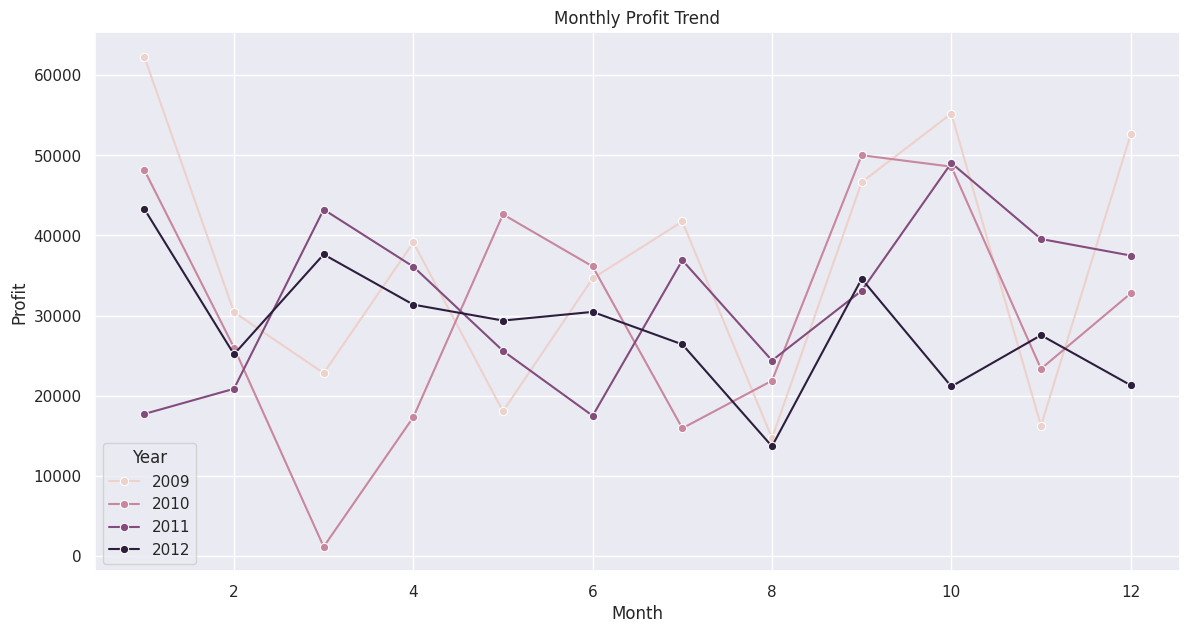

In [ ]:
monthly_sales = df.groupby(['Year','Month'])['Profit'].sum().reset_index()
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=monthly_sales, x='Month', y='Profit', hue='Year', marker='o')
plt.title("Monthly Profit Trend")
add_line_labels(ax)
plt.show()

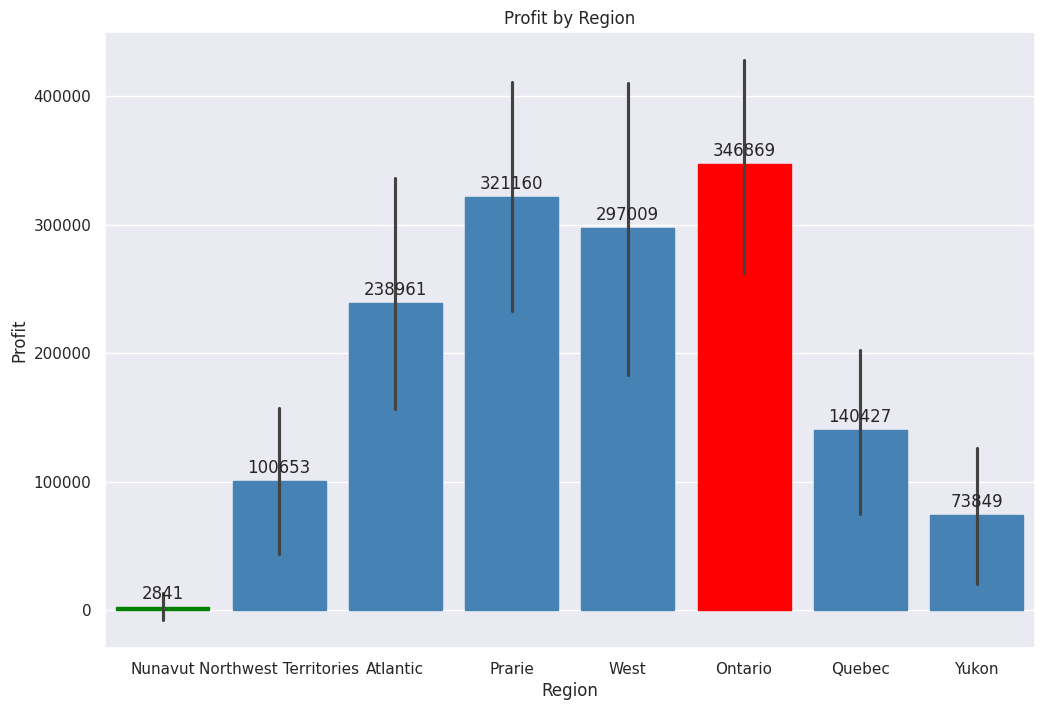

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='Region', y='Profit', estimator=sum)

bars = ax.patches
heights = [bar.get_height() for bar in bars]

max_height = max(heights)
min_height = min(heights)

for bar in bars:
    if bar.get_height() == max_height:
        bar.set_color('red')
    elif bar.get_height() == min_height:
        bar.set_color('green')
    else:
        bar.set_color('steelblue')

ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)

plt.title("Profit by Region")
plt.show()


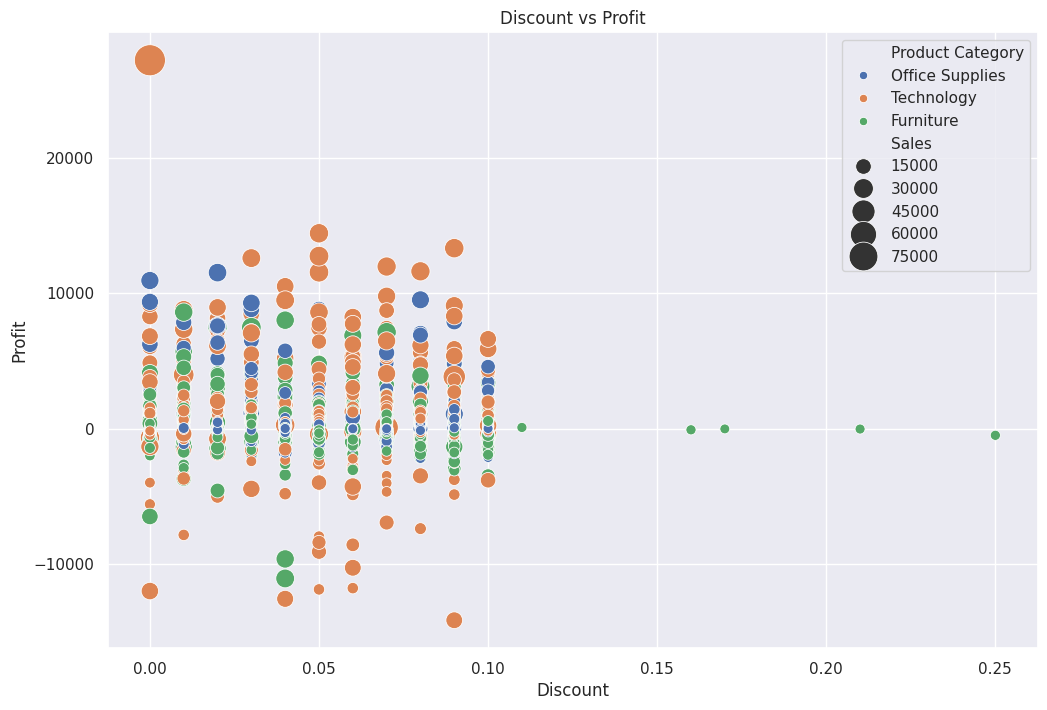

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df,
    x='Discount',
    y='Profit',
    hue='Product Category',     # color by product category
    size='Sales',       # bubble size by sales
    sizes=(50, 500),    # min and max bubble size
)

plt.title("Discount vs Profit")
plt.show()


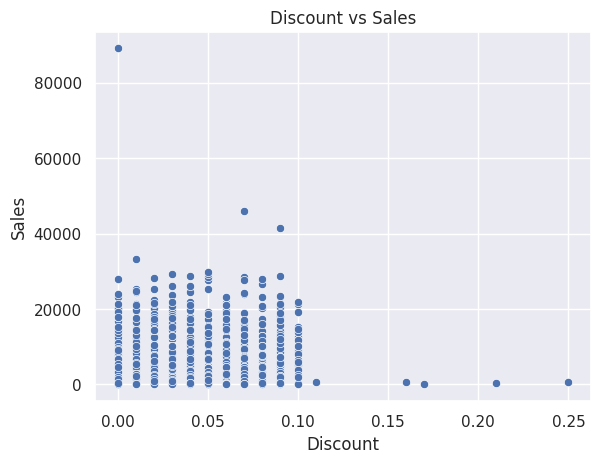

In [ ]:
sns.scatterplot(data=df, x='Discount', y='Sales')
plt.title("Discount vs Sales")
plt.show()

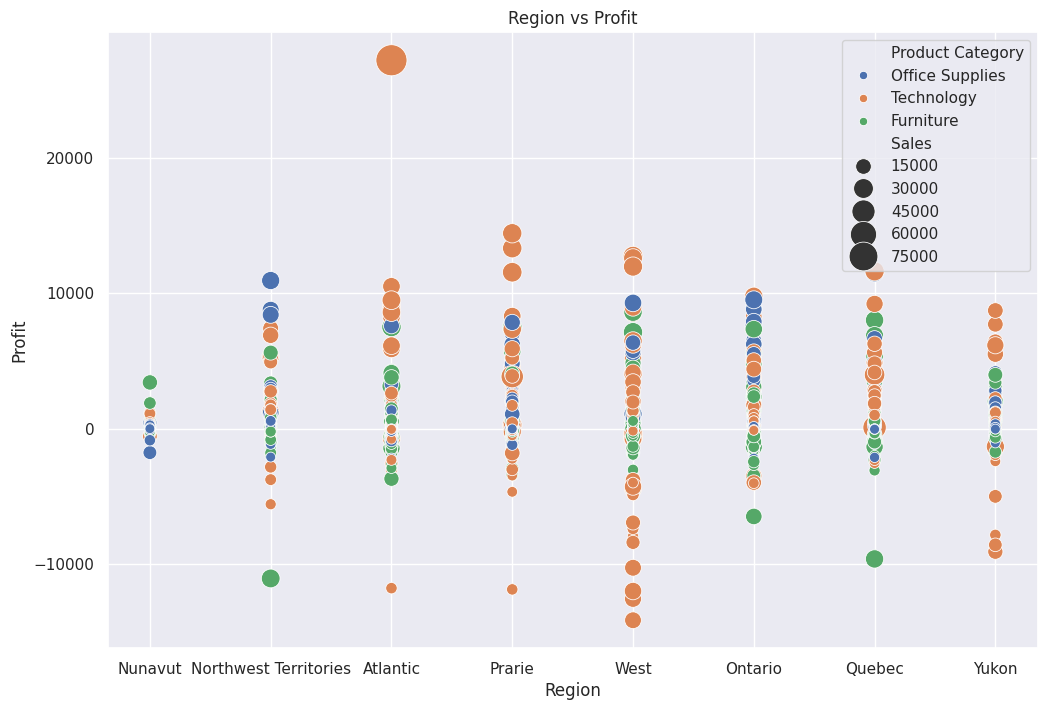

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df,
    x='Region',
    y='Profit',
    hue='Product Category',     # color by product category
    size='Sales',       # bubble size by sales
    sizes=(50, 500),    # min and max bubble size
)

plt.title("Region vs Profit")
plt.show()
